#                         Regression: Bangalore House price prediction

### Dataset link : [kaggle](https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data)

In [76]:
pip install --upgrade scikit-learn

   ---------------------------------------- 10.6/10.6 MB 399.5 kB/s eta 0:00:00
   -------------------------------------- 302.2/302.2 kB 583.9 kB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [77]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
matplotlib.rcParams["figure.figsize"] = (20,10)

# #Loading dataset

In [78]:
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.00,1.00,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.00,3.00,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.00,3.00,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.00,1.00,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.00,1.00,51.00


# Exploratary data analysis on uncleaned data

In [79]:
data.shape

(13320, 9)

In [80]:
#printing unique values in columns
list = ["area_type","location","size", "society","bath","balcony"]
for column in list:
    print("values in column ",column ," are ",data[column].unique())

values in column  area_type  are  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area']
values in column  location  are  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']
values in column  size  are  ['2 BHK' '4 Bedroom' '3 BHK' '4 BHK' '6 Bedroom' '3 Bedroom' '1 BHK'
 '1 RK' '1 Bedroom' '8 Bedroom' '2 Bedroom' '7 Bedroom' '5 BHK' '7 BHK'
 '6 BHK' '5 Bedroom' '11 BHK' '9 BHK' nan '9 Bedroom' '27 BHK'
 '10 Bedroom' '11 Bedroom' '10 BHK' '19 BHK' '16 BHK' '43 Bedroom'
 '14 BHK' '8 BHK' '12 Bedroom' '13 BHK' '18 Bedroom']
values in column  society  are  ['Coomee ' 'Theanmp' nan ... 'SJovest' 'ThhtsV ' 'RSntsAp']
values in column  bath  are  [ 2.  5.  3.  4.  6.  1.  9. nan  8.  7. 11. 10. 14. 27. 12. 16. 40. 15.
 13. 18.]
values in column  balcony  are  [ 1.  3. nan  2.  0.]


In [81]:
#counting null values in each columns
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

### droping column society,area_type,availability,balcony since these columns dont have effect on sales price

In [82]:
data2 = data.drop(['area_type','availability','society','balcony'],axis = "columns")
data2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.00,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00
2,Uttarahalli,3 BHK,1440,2.00,62.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00
4,Kothanur,2 BHK,1200,2.00,51.00


In [83]:
data2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [84]:
#dropping all null values
data3 = data2.dropna()
data3.shape

(13246, 5)

In [85]:
#analysis on location column
count = 0
for i in data3["location"].unique():
    print(i)
    count = count + 1
print(count)

Electronic City Phase II
Chikka Tirupathi
Uttarahalli
Lingadheeranahalli
Kothanur
Whitefield
Old Airport Road
Rajaji Nagar
Marathahalli
Gandhi Bazar
7th Phase JP Nagar
Gottigere
Sarjapur
Mysore Road
Bisuvanahalli
Raja Rajeshwari Nagar
Ramakrishnappa Layout
Manayata Tech Park
Kengeri
Binny Pete
Thanisandra
Bellandur
 Thanisandra
Mangammanapalya
Electronic City
Ramagondanahalli
Yelahanka
Hebbal
Kasturi Nagar
Kanakpura Road
Electronics City Phase 1
Kundalahalli
Chikkalasandra
Murugeshpalya
Sarjapur  Road
Ganga Nagar
HSR Layout
Doddathoguru
KR Puram
Himagiri Meadows
Adarsh Nagar
Bhoganhalli
Lakshminarayana Pura
Begur Road
Govindaraja Nagar Ward
Tharabanahalli
Varthur
Bommanahalli
Gunjur
Devarachikkanahalli
Double Road
Hegde Nagar
Haralur Road
Hennur Road
Kothannur
Kalena Agrahara
Cholanayakanahalli
Kaval Byrasandra
ISRO Layout
Kodanda Reddy Layout
Garudachar Palya
EPIP Zone
Dasanapura
Kasavanhalli
Sanjay nagar
 Mysore Highway
Domlur
Sarjapura - Attibele Road
Devasthanagalu
T Dasarahalli
Ye

### a total of 1304 different locations, so we need to convert total locations into different clusters for reducing complexity of data


In [86]:
# analysis on column size
data3["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

# Feature Engineering

### here several values are actually same like 4 bedrooms and 4bhk
### so converting into a standard value(integer) column no. of bedrooms which contains only the integer values

In [87]:
#defining a function
def num_of_rooms(size):
    bhk = size.split()
    return float(bhk[0])
eg = "2 BHK"
print(num_of_rooms(eg))

2.0


# Data preprocessing

In [88]:
data3["no_of_bedrooms"] = data3["size"].apply(num_of_rooms)
data3.head()

C:\Users\navee\AppData\Local\Temp/ipykernel_2204/3296191823.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["no_of_bedrooms"] = data3["size"].apply(num_of_rooms)


,location,size,total_sqft,bath,price,no_of_bedrooms
0,Electronic City Phase II,2 BHK,1056,2.00,39.07,2.00
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00,4.00
2,Uttarahalli,3 BHK,1440,2.00,62.00,3.00
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00,3.00
4,Kothanur,2 BHK,1200,2.00,51.00,2.00


In [89]:
#analysis and cleaning column total_sqft
data3['total_sqft'].unique()


array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [90]:
data3.describe()

,bath,price,no_of_bedrooms
count,"13,246.00","13,246.00","13,246.00"
mean,2.69,112.39,2.80
std,1.34,149.08,1.30
min,1.00,8.00,1.00
25%,2.00,50.00,2.00
50%,2.00,72.00,3.00
75%,3.00,120.00,3.00
max,40.00,"3,600.00",43.00


In [91]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

data3[~data3["total_sqft"].apply(is_float)].shape

(190, 6)

In [92]:
# defining a function that creates a new value by taking mean if it is a range 
def convert(x):
    values = x.split('-')
    if len(values) == 2:
        return (float(values[0])+float(values[1]))/2
    try:
        return float(x)
    except:
        return None

In [93]:
data3["total_sqfts"] = data3["total_sqft"].apply(convert)
data3.head()

C:\Users\navee\AppData\Local\Temp/ipykernel_2204/2418867981.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3["total_sqfts"] = data3["total_sqft"].apply(convert)


,location,size,total_sqft,bath,price,no_of_bedrooms,total_sqfts
0,Electronic City Phase II,2 BHK,1056,2.00,39.07,2.00,"1,056.00"
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00,4.00,"2,600.00"
2,Uttarahalli,3 BHK,1440,2.00,62.00,3.00,"1,440.00"
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00,3.00,"1,521.00"
4,Kothanur,2 BHK,1200,2.00,51.00,2.00,"1,200.00"


In [94]:
data3.shape

(13246, 7)

In [95]:
data3.isnull().sum()

location           0
size               0
total_sqft         0
bath               0
price              0
no_of_bedrooms     0
total_sqfts       46
dtype: int64

In [96]:
data4 =  data3.dropna()
data4.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
no_of_bedrooms    0
total_sqfts       0
dtype: int64

# Feature Engineering

### Add new feature called price per square feet

In [97]:
data5 = data4.copy()
data5["price_per_sqft"] = data5['price']*100000/data5['total_sqfts']


In [98]:
data5.head()

,location,size,total_sqft,bath,price,no_of_bedrooms,total_sqfts,price_per_sqft
0,Electronic City Phase II,2 BHK,1056,2.00,39.07,2.00,"1,056.00","3,699.81"
1,Chikka Tirupathi,4 Bedroom,2600,5.00,120.00,4.00,"2,600.00","4,615.38"
2,Uttarahalli,3 BHK,1440,2.00,62.00,3.00,"1,440.00","4,305.56"
3,Lingadheeranahalli,3 BHK,1521,3.00,95.00,3.00,"1,521.00","6,245.89"
4,Kothanur,2 BHK,1200,2.00,51.00,2.00,"1,200.00","4,250.00"


In [99]:
data6 = data5.drop(['size','total_sqft',],axis = 'columns')
data6.head()

,location,bath,price,no_of_bedrooms,total_sqfts,price_per_sqft
0,Electronic City Phase II,2.00,39.07,2.00,"1,056.00","3,699.81"
1,Chikka Tirupathi,5.00,120.00,4.00,"2,600.00","4,615.38"
2,Uttarahalli,2.00,62.00,3.00,"1,440.00","4,305.56"
3,Lingadheeranahalli,3.00,95.00,3.00,"1,521.00","6,245.89"
4,Kothanur,2.00,51.00,2.00,"1,200.00","4,250.00"


In [100]:
pd.set_option('display.float_format',  '{:,.2f}'.format)
data6.describe()

,bath,price,no_of_bedrooms,total_sqfts,price_per_sqft
count,"13,200.00","13,200.00","13,200.00","13,200.00","13,200.00"
mean,2.69,112.28,2.80,"1,555.30","7,920.76"
std,1.34,149.18,1.29,"1,237.32","106,727.16"
min,1.00,8.00,1.00,1.00,267.83
25%,2.00,50.00,2.00,"1,100.00","4,267.70"
50%,2.00,71.85,3.00,"1,275.00","5,438.33"
75%,3.00,120.00,3.00,"1,672.00","7,317.07"
max,40.00,"3,600.00",43.00,"52,272.00","12,000,000.00"


In [101]:
data7 = data6.copy()

### Examine locations which is a categorical variable. We need to apply dimensionality reduction technique here to reduce number of locations

In [102]:
location_stat = data7.groupby('location').size().sort_values(ascending = False)

In [103]:
loc_less_than_10 = location_stat[location_stat<=10]
loc_less_than_10

location
Dairy Circle            10
Sadashiva Nagar         10
Nagappa Reddy Layout    10
Kalkere                 10
Naganathapura           10
                        ..
 Banaswadi               1
Kanakadasa Layout        1
Kanakapur main road      1
Kanakapura  Rod          1
whitefiled               1
Length: 1058, dtype: int64

### Dimensionality reduction

In [104]:
data8 = data7.copy()
def loc_convert(x):
    if x in loc_less_than_10:
        return "other"
    else:
        return x
data8['location_stat'] = data8['location'].apply(loc_convert)
data8

,location,bath,price,no_of_bedrooms,total_sqfts,price_per_sqft,location_stat
0,Electronic City Phase II,2.00,39.07,2.00,"1,056.00","3,699.81",Electronic City Phase II
1,Chikka Tirupathi,5.00,120.00,4.00,"2,600.00","4,615.38",Chikka Tirupathi
2,Uttarahalli,2.00,62.00,3.00,"1,440.00","4,305.56",Uttarahalli
3,Lingadheeranahalli,3.00,95.00,3.00,"1,521.00","6,245.89",Lingadheeranahalli
4,Kothanur,2.00,51.00,2.00,"1,200.00","4,250.00",Kothanur
...,...,...,...,...,...,...,...
13315,Whitefield,4.00,231.00,5.00,"3,453.00","6,689.83",Whitefield
13316,Richards Town,5.00,400.00,4.00,"3,600.00","11,111.11",other
13317,Raja Rajeshwari Nagar,2.00,60.00,2.00,"1,141.00","5,258.55",Raja Rajeshwari Nagar
13318,Padmanabhanagar,4.00,488.00,4.00,"4,689.00","10,407.34",Padmanabhanagar


In [105]:
len(data8['location_stat'].unique())

241

In [106]:
#removing outliers using rooms per squarefeet
data9 =  data8[~(data8['total_sqfts']/data8['no_of_bedrooms']<300)]

In [107]:
data9.shape

(12456, 7)

In [108]:
#outlier removal in column price per sqft considering unique location
data9.groupby('location')

### outlier removal using mean and standard deviation after grouping by location

In [109]:
def outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in data9.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        red_df = subdf[((subdf.price_per_sqft>m-st)&(subdf.price_per_sqft<=m+st))]
        df_out = pd.concat([df_out,red_df],ignore_index = True)
    return df_out

In [110]:
data10 = outlier(data9)
data10.shape

(9259, 7)

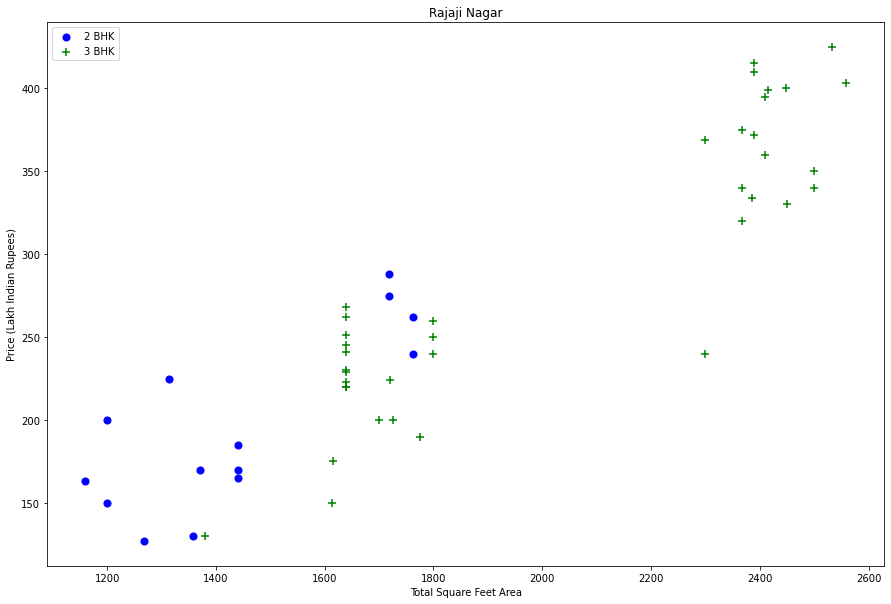

In [111]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.no_of_bedrooms==2)]
    bhk3 = df[(df.location==location) & (df.no_of_bedrooms==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqfts,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqfts,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(data10,"Rajaji Nagar")

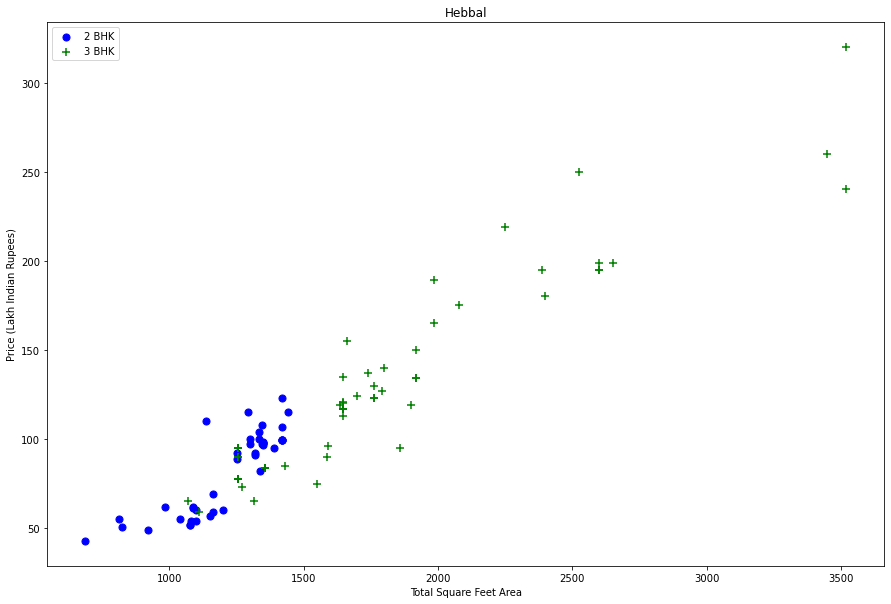

In [112]:
plot_scatter_chart(data10,"Hebbal")

### removing outliers for bhk,since like 2 bhk cant have more price than 3 bhk for same area

In [113]:
def outliers_bhk(df):
    exc_ind = np.array([])
    for loc , loc_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in loc_df.groupby('no_of_bedrooms'):
            bhk_stats[bhk] ={
                "mean" : np.mean(bhk_df.price_per_sqft),
                "std" : np.std(bhk_df.price_per_sqft),
                "count" : bhk_df.shape[0]
            }
        for bhk, bhk_df in loc_df.groupby('no_of_bedrooms'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exc_ind = np.append(exc_ind, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)

    return df.drop(exc_ind,axis = 'index')

In [114]:
data11 = outliers_bhk(data10)
data11.shape

(7509, 7)

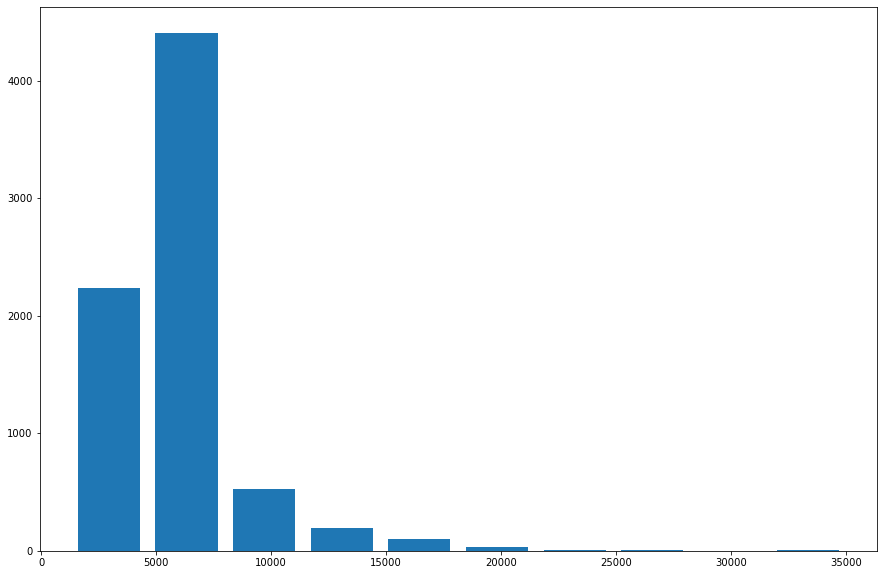

In [115]:
plt.hist(data11.price_per_sqft,rwidth=0.8)
plt.show()

In [116]:
data11 =  data11[data11.bath<data11.no_of_bedrooms+2]

In [117]:
#dropping unnecessary columns
data12 = data11.drop(['location','price_per_sqft'],axis = 'columns')
data12

,bath,price,no_of_bedrooms,total_sqfts,location_stat
0,3.00,150.00,3.00,"1,672.00",other
1,3.00,149.00,3.00,"1,750.00",other
2,3.00,150.00,3.00,"1,750.00",other
4,2.00,40.00,2.00,"1,250.00",Devarachikkanahalli
5,2.00,83.00,2.00,"1,200.00",Devarachikkanahalli
...,...,...,...,...,...
9254,3.00,325.00,3.00,"2,900.00",other
9255,3.00,84.83,3.00,"1,780.00",other
9256,2.00,48.00,2.00,880.00,other
9257,2.00,55.00,2.00,"1,000.00",other


# use OneHotEncoding to create dummy columns for the location_stat column

In [118]:
dummies = pd.get_dummies(data12.location_stat)

In [119]:
dummies

,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9255,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9256,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9257,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [120]:
data13 = pd.concat([data12.drop(['location_stat'],axis = 'columns'),dummies.drop(['other'],axis = 'columns')],axis = 'columns')
data13.head()

,bath,price,no_of_bedrooms,total_sqfts,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3.00,150.00,3.00,"1,672.00",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.00,149.00,3.00,"1,750.00",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.00,150.00,3.00,"1,750.00",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,40.00,2.00,"1,250.00",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.00,83.00,2.00,"1,200.00",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
X = data13.drop("price",axis='columns')
y = data13.price

In [122]:
print(X)

      bath  no_of_bedrooms  total_sqfts   Devarachikkanahalli  \
0     3.00            3.00     1,672.00                     0   
1     3.00            3.00     1,750.00                     0   
2     3.00            3.00     1,750.00                     0   
4     2.00            2.00     1,250.00                     1   
5     2.00            2.00     1,200.00                     1   
...    ...             ...          ...                   ...   
9254  3.00            3.00     2,900.00                     0   
9255  3.00            3.00     1,780.00                     0   
9256  2.00            2.00       880.00                     0   
9257  2.00            2.00     1,000.00                     0   
9258  2.00            3.00     1,400.00                     0   

      1st Block Jayanagar  1st Phase JP Nagar  2nd Phase Judicial Layout  \
0                       0                   0                          0   
1                       0                   0                      

In [123]:
print(y)

0      150.00
1      149.00
2      150.00
4       40.00
5       83.00
        ...  
9254   325.00
9255    84.83
9256    48.00
9257    55.00
9258    78.00
Name: price, Length: 7430, dtype: float64


In [124]:
#splitting data for training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# Model training

In [125]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [126]:
regressor.score(X_test, y_test)

0.7521182187435288

In [127]:
y_pred = regressor.predict(X_test)

In [128]:
X_test

,bath,no_of_bedrooms,total_sqfts,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
2362,2.00,2.00,"1,152.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7089,2.00,2.00,850.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8729,2.00,2.00,"1,180.00",0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5276,2.00,2.00,"1,300.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
553,3.00,3.00,"2,010.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,2.00,2.00,"1,140.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3069,3.00,3.00,"1,464.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,2.00,2.00,660.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3158,2.00,2.00,"1,092.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
for i in y_pred:
    print(i)

61.95976026359354
13.96414488050683
63.11617646402266
152.58115090767723
162.26334769876428
1.569424560166837
53.17438227115518
101.5358216783947
160.76745567525847
405.72777563798667
47.25245995223335
45.138761399744844
131.869606623866
78.1150259176165
51.287468861477606
79.31743116745328
79.97572321575784
47.17314538907651
79.00846234482135
229.08354763969936
125.13295386012125
59.23191149015453
61.55297336660661
84.00046251447604
99.21927729869742
164.40320195372044
16.636957375202726
78.1150259176165
74.78873466940892
98.4495459941342
25.98433301965693
39.23532368793863
187.97334797359366
60.908893545178444
44.87019559984176
66.43855755065587
122.66924697561045
105.50742125626178
62.69019908257253
128.8213115180087
55.54280202130683
86.85610920842727
45.948108255652485
68.76122965673817
126.31647368011237
59.21996494469836
227.04946526167942
93.73884102163434
35.3610903455349
37.42102947590966
93.68209437079365
323.37531445886606
51.704889276513384
81.56835645949789
92.46880479515

In [130]:
from sklearn.tree import DecisionTreeRegressor
regressor_tree = DecisionTreeRegressor(random_state = 0)
regressor_tree.fit(X_train, y_train)
regressor_tree.score(X_test, y_test)

0.5580872737576585

## Use K Fold cross validation to measure accuracy of our LinearRegression model

In [131]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits = 5,test_size = 0.2,random_state = 0)
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.62280338, 0.59894875, 0.72664045, 0.7670727 , 0.61533226])

## using GridSearchCV

In [132]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.67,{'normalize': False}
1,lasso,0.59,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.48,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [133]:
X.head()

,bath,no_of_bedrooms,total_sqfts,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,3.00,3.00,"1,672.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.00,3.00,"1,750.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.00,3.00,"1,750.00",0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2.00,2.00,"1,250.00",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2.00,2.00,"1,200.00",1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [134]:

def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = bath
    x[1] = bhk
    x[2] = sqft
    if loc_index >= 0:
        x[loc_index] = 1

    return regressor.predict([x])[0]

In [135]:
X.columns

Index(['bath', 'no_of_bedrooms', 'total_sqfts', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [136]:
predict_price('2nd Stage Nagarbhavi',1000,2,2)

185.64057506036193

In [137]:
predict_price('2nd Stage Nagarbhavi',1000,3,3)

184.2182919946253

In [138]:
predict_price('Indira Nagar',1000,2,2)

148.7882349346981

### exporting model to a pickle file

In [139]:
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(regressor,f)

### exporting column information of location to a json file

In [140]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))

In [141]:
lst = ['bath', 'no_of_bedrooms', 'total_sqfts', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Block Hbr Layout', '5th Phase JP Nagar',
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur']

lst.index("Vittasandra")

13